## Entangling qubits with a CNOT gate
Many quantum algorithms leverage a property of quantum mechanics that Einstein called "spooky actions at a distance", known as *quantum entanglement*. In quantum computing, entanglement requires the use of quantum gates that operate on more than one qubit at a time. One such gate is the CNOT, which we'll use in conjunction with a Hadamard gate to maximally entangle two qubits.


To demonstrate entanglement, we'll create a two-wire quantum circuit with the [Qiskit](https://qiskit.org/) framework:

In [3]:
# Include the necessary imports for this program
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

So that we can examine the quantum state vector when the qubits are entangled, we're going to use Qiskit's "statevector_simulator". We'll create the canonical entanglement circuit, that consists of a Hadamard followed by a CNOT:

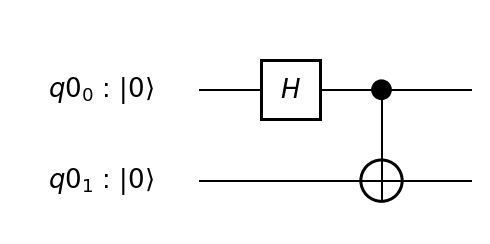

In [4]:
# Create a Quantum Register with 2 qubits
qr = QuantumRegister(2)

# Create a Quantum Circuit from the quantum register. Because we're going to use
# the statevector_simulator, we won't measure the circuit or need classical registers.
circ = QuantumCircuit(qr)

# Place Hadamard gate on the top wire, putting this qubit in a superposition.
circ.h(qr[0])

# Add a CX (CNOT) gate across the top two wires, entangling the qubits.
circ.cx(qr[0], qr[1])

# Draw the circuit
circ.draw(output='mpl')


Now that the quantum circuit has been defined and drawn, we'll execute it on a state vector simulator and examine the quantum state, which is one of the four [Bell states](https://en.wikipedia.org/wiki/Bell_state).

In [6]:
# Use the BasicAer statevector_simulator backend
from qiskit import BasicAer
backend_sv_sim = BasicAer.get_backend('statevector_simulator')

# Execute the circuit on the state vector simulator
job_sim = execute(circ, backend_sv_sim)

# Grab the results from the job.
result_sim = job_sim.result()

# Obtain the state vector for the quantum circuit
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector in a manner that contains a comma-delimited string.
quantum_state

array([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.707+0.j])

Now visualize this Bell state on a Q-sphere:

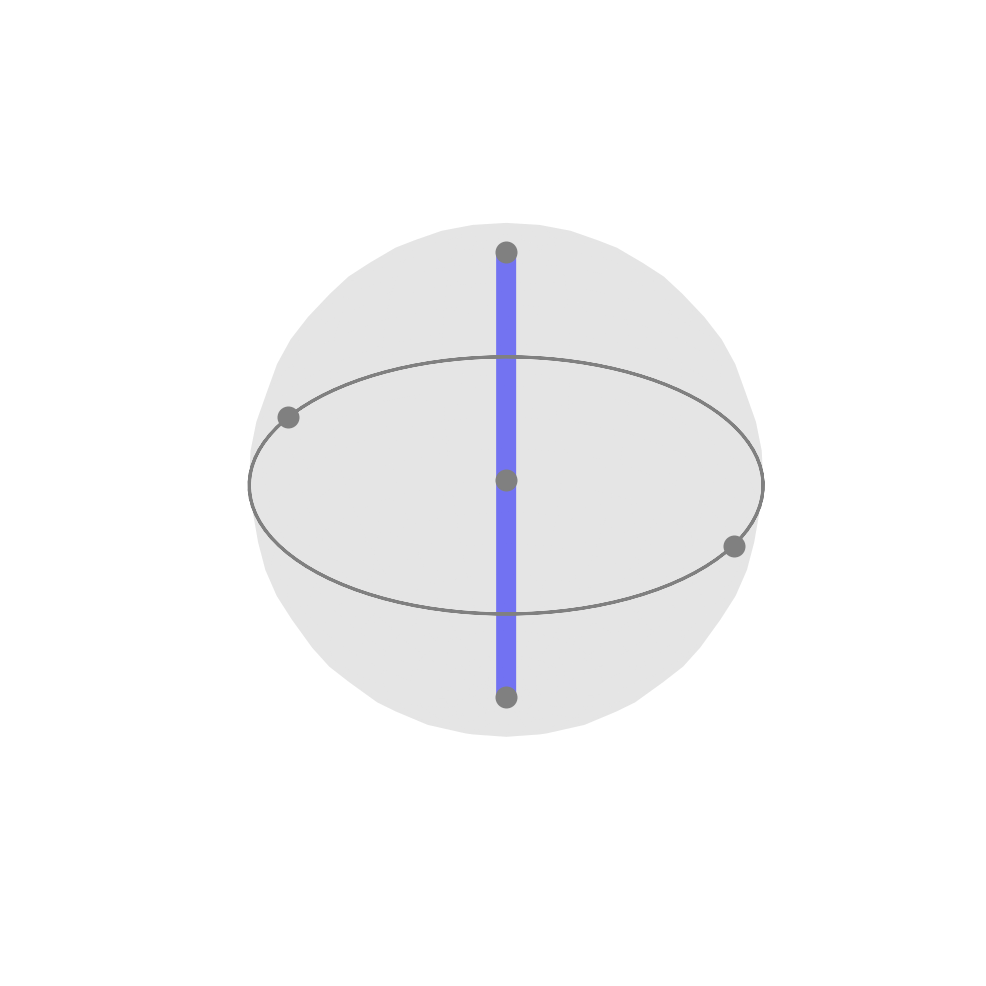

In [7]:
# Plot the state vector on a Q-sphere
from qiskit.tools.visualization import plot_state_qsphere
plot_state_qsphere(quantum_state)

#### The Bell states
The output of the previously run cell contains a comma-separated string that represents the circuit's quantum state, in this case one of the Bell states. Here is the quantum state in vector notation:

$$
 \begin{bmatrix}
  1 \\
  0 \\
  0 \\
  1
 \end{bmatrix}=
 \begin{bmatrix}
  ? \\
  ?
 \end{bmatrix}\otimes
 \begin{bmatrix}
  ? \\
  ?
 \end{bmatrix}
$$

As noted by the question marks in the qubit state vectors, the Bell states cannot be expressed as the tensor product of their individual qubit state vectors. 

This Bell state may also be represented using Dirac notation as

$$\vert\Phi^+\rangle = \frac{\vert00\rangle+\vert11\rangle}{\sqrt{2}}$$

where $\vert\Phi^+\rangle$ is the usual way of denoting this particular Bell state. Note that the $\sqrt{2}$ in the denominator normalizes the state so that its probabilities sum to 1. In this Bell state, measurement will result in $\vert00\rangle$ and $\vert11\rangle$ with equal probability. Therefore, given the circuit in the previous code example (and ignoring errors on the quantum device), if the result of measuring the top wire is $\vert0\rangle$, then the result of measuring the bottom wire will be $\vert0\rangle$. Conversely, if the result of measuring the top wire is $\vert1\rangle$, then the result of measuring the bottom wire will be $\vert1\rangle$. This behavior demonstrates that the two qubits are entangled.

There are three other Bell states, for a total of four. Each of the Bell states are the _maximally entangled_ states for two qubits, meaning that their measurements are most highly correlated. These additional Bell states are represented in vector notaton and Dirac notation as follows:

$$
 \vert\Phi^-\rangle = 
 \begin{bmatrix}
  1 \\
  0 \\
  0 \\
  -1
 \end{bmatrix}=
\frac{\vert00\rangle-\vert11\rangle}{\sqrt{2}}
$$

$$
 \vert\Psi^+\rangle = 
 \begin{bmatrix}
  0 \\
  1 \\
  1 \\
  0
 \end{bmatrix}=
\frac{\vert01\rangle+\vert10\rangle}{\sqrt{2}}
$$

$$
 \vert\Psi^-\rangle = 
 \begin{bmatrix}
  0 \\
  1 \\
  -1 \\
  0
 \end{bmatrix}=
\frac{\vert01\rangle-\vert10\rangle}{\sqrt{2}}
$$

Each of the Bell states are _orthogonal_, or perpendicular, to each other in a four dimensional vector space. Mathematically, two vectors are orthogonal if their [dot product](https://en.wikipedia.org/wiki/Dot_product "Dot product article on Wikipedia") is $0$. 

> Note: A simple example of orthogonal vectors in a two dimensional vector space is the $\vert0\rangle$ and $\vert1\rangle$ basis states whose dot product is $0$:
>
> $$
 \begin{bmatrix}
  1 \\
  0
 \end{bmatrix}\cdot
 \begin{bmatrix}
  0 \\
  1
 \end{bmatrix}=
 \left(1\cdot0\right) + \left(0\cdot1\right)=
 0
$$

Taking the dot product (more generally the _inner product_) on any two of the Bell states will result in $0$. For example, let's do that with the $\vert\Psi^-\rangle$ and $\vert\Phi^+\rangle$ Bell states:

$$
 \begin{bmatrix}
  0 \\
  1 \\
  -1 \\
  0
 \end{bmatrix}\cdot
 \begin{bmatrix}
  1 \\
  0 \\
  0 \\
  1
 \end{bmatrix}=
 \left(0\cdot1\right) + \left(1\cdot0\right) + \left(-1\cdot0\right) + \left(0\cdot1\right)=
 0
$$

Another way of expressing this inner product is in Dirac notation in the following manner:

$$\langle\Psi^-\vert\Phi^+\rangle$$

In Dirac notation the $\langle\vert$ symbol is called a [bra](https://en.wikipedia.org/wiki/Bra%E2%80%93ket_notation "Bra-ket notation article on Wikipedia"), and it represents the _conjugate transpose_ of a column vector, which is a [row vector](https://en.wikipedia.org/wiki/Row_and_column_vectors "Row and column vectors article on Wikipedia"). Because this vector contains no _complex numbers_, only a simple [transpose](https://en.wikipedia.org/wiki/Transpose "Transpose article on Wikipedia") is required. So the inner product shown in Dirac notation previously may be expressed as the following [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication "Matrix multiplication article on Wikipedia"):

$$
 \begin{bmatrix}
  0 &
  1 &
  -1 &
  0
 \end{bmatrix}
 \begin{bmatrix}
  1 \\
  0 \\
  0 \\
  1
 \end{bmatrix}=
 \begin{bmatrix}
  \left(0\cdot1\right) + \left(1\cdot0\right) + \left(-1\cdot0\right) + \left(0\cdot1\right)
 \end{bmatrix}=
 0
$$

Now we'll generate another visualization of the $\vert\Phi^+\rangle$ Bell on a Q-sphere. To do this, paste the comma-separated state vector produced earlier into the text field in the upper-left corner of the [Quantum Spheres Playground application](https://javafxpert.github.io/quantum-state-spheres/ "Quantum Spheres Playground application"). You should see a Q-sphere similar to the following, with the volumes of the balls corresponding to $\vert00\rangle$ and $\vert11\rangle$ signifying equal measurement probability.

<div align='center'><img src='images/qsphere-bell-phi-plus.png' width=400 title='Q-sphere representation the Phi+ Bell state'>
</div>

<br/>
To verify that the qubits are entangled, let's measure them several times. First we'll add measurements to the circuit and create an updated drawing:

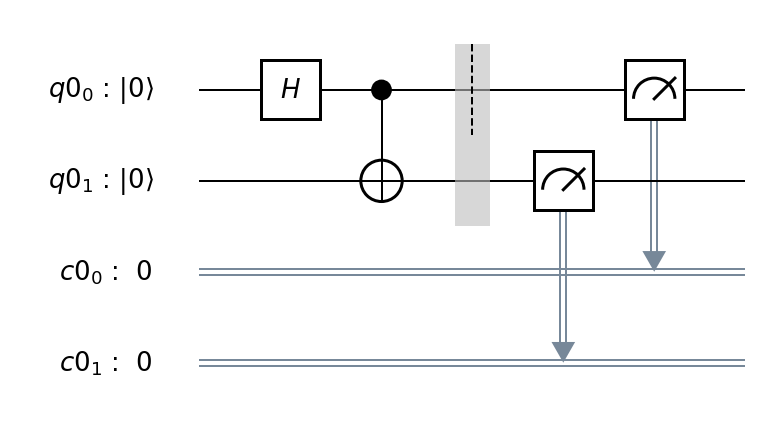

In [8]:
# Create a Classical Register with 2 bits
cr = ClassicalRegister(2)

# Create the measurement portion of a quantum circuit
meas_circ = QuantumCircuit(qr, cr)

# Create a barrier that separates the gates from the measurements
meas_circ.barrier(qr)

# Measure the qubits into the classical registers
meas_circ.measure(qr, cr)

# Add the measument circuit to the original circuit
complete_circuit = circ + meas_circ

# Draw the new circuit
complete_circuit.draw(output='mpl')

Now we'll execute the updated circuit on a quantum simulator that includes measurements:

In [10]:
# Use the BasicAer qasm_simulator backend
from qiskit import BasicAer
backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator, running it 1000 times.
job_sim = execute(complete_circuit, backend_sim, shots=1000)

# Grab the results from the job.
result_sim = job_sim.result()

# Print the counts, which are contained in a Python dictionary
counts = result_sim.get_counts(complete_circuit)
print(counts)

{'00': 504, '11': 496}


The result of the measurements should be fairly evenly split between $\vert00\rangle$ and $\vert11\rangle$.

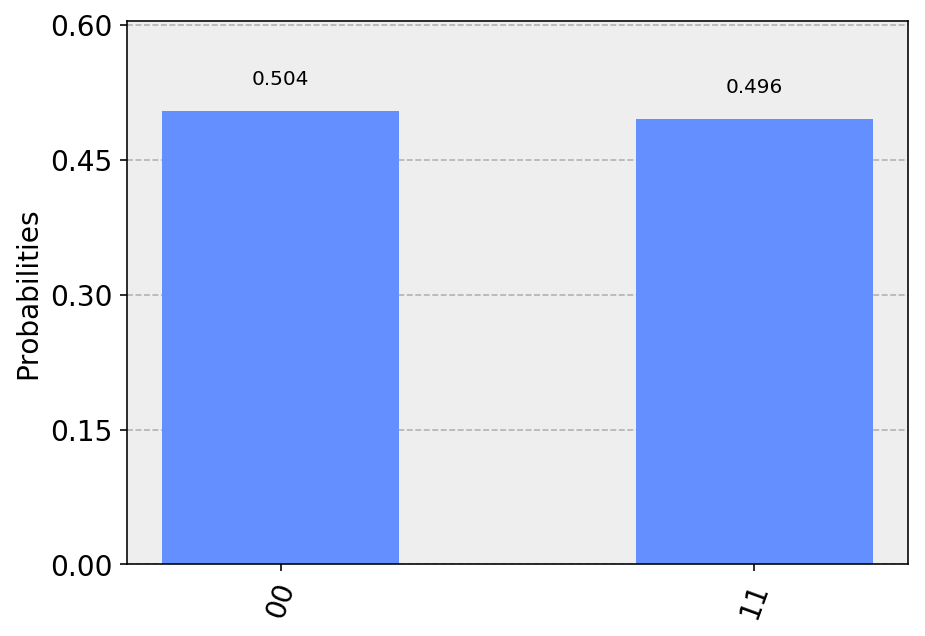

In [11]:
# Plot the results on a histogram
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

#### Now it's your turn to play!
Here's a challenge for you: In the following cells, modify and run the previous cells three times, each producing one of the remaining three Bell states and associated circuits. 

First, create a circuit for one of the Bell states:

In [0]:
# Include the necessary imports for this program


# Create a Quantum Register with 2 qubits


# Create a Quantum Circuit from the quantum register. Because we're going to use
# the statevector_simulator, we won't measure the circuit or need classical registers.


# Place appropriate gates on the wires to achieve the desired Bell state


# Draw the circuit


Next, execute the circuit on a state vector simulator and output its state vector

In [0]:
# Use the BasicAer statevector_simulator backend


# Execute the circuit on the state vector simulator


# Grab the results from the job.


# Obtain the state vector for the quantum circuit


# Output the quantum state vector in a manner that contains a comma-delimited string.


Next, visualize this Bell state on a Q-sphere. Note that the colors used in Q-sphere visualizations denote the _phase_ of a basis state, so in a couple of these visualizations you should see two different colors.

In [0]:
# Plot the state vector on a Q-sphere


Paste the comma-separated state vector into the [Quantum Spheres Playground application](https://javafxpert.github.io/quantum-state-spheres/ "Quantum Spheres Playground application") for an alternative visualization on a Q-sphere.

To verify that the qubits are entangled, measure them several times. First, add measurements to the circuit and create an updated drawing:

In [0]:
# Create a Classical Register with 2 bits


# Create the measurement portion of a quantum circuit


# Create a barrier that separates the gates from the measurements


# Measure the qubits into the classical registers


# Add the measument circuit to the original circuit


# Draw the new circuit


Execute the updated circuit on a quantum simulator that includes measurements:

In [0]:
# Use the BasicAer qasm_simulator backend


# Execute the circuit on the qasm simulator, running it 1000 times.


# Grab the results from the job.


# Print the counts, which are contained in a Python dictionary


Depending on the Bell state, the result of the measurements should be fairly evenly split between $\vert00\rangle$ and $\vert11\rangle$, or $\vert01\rangle$ and $\vert10\rangle$.

Finally, plot the results on a histogram.

In [0]:
# Plot the results on a histogram


If you successfully completed this challenge, then congratulations are in order! In the next lesson, we'll take a closer look at the gates introduced so far, including the properties of their underlying _unitary matrices_.